In [725]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [726]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-10-08 14:34:32--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.53’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.01s   

2025-10-08 14:34:32 (70.0 MB/s) - ‘car_fuel_efficiency.csv.53’ saved [874188/874188]



In [727]:
df = pd.read_csv('car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [728]:
df.columns



Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [729]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [730]:
df = df[['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg']]

df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

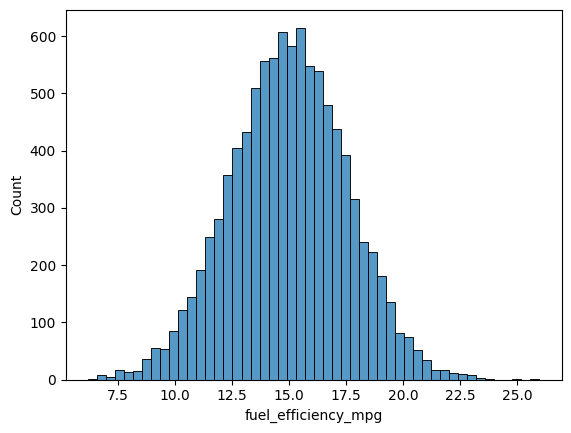

In [731]:
sns.histplot(df.fuel_efficiency_mpg, bins= 50)
# its bull curve

In [732]:
df['horsepower'].median()

np.float64(149.0)

In [733]:
n = len(df)
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [734]:
# Dividing number of records
n = len(df)
print(n)

n_test = int(n*0.2)
n_val = int(n*0.2)
n_train = n - (n_val + n_test)

print(n_test)
print(n_test + n_val + n_train)

9704
1940
9704


In [735]:
df_train = df.iloc[idx[:n_train]]
df_val =  df.iloc [idx[n_train : n_train + n_val ]]
df_test = df.iloc [idx[ n_train + n_val :]]

In [736]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

print(len(y_val))


del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

1940


In [737]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [738]:
def prepare_X(df):
    df_num = df
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [739]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [740]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 0.5173782638844466


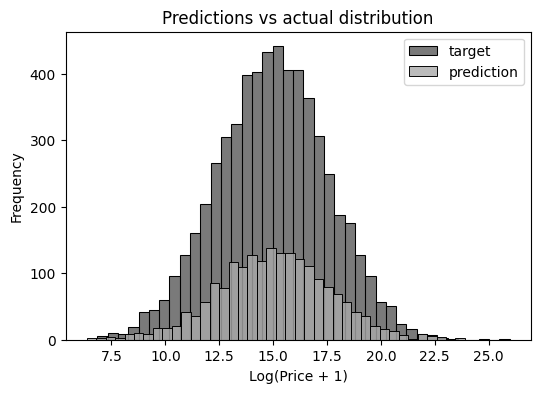

In [741]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [742]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [743]:
 

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))


validation: 0.5173782638844466


In [744]:
def prepare_X_Mean(df):
    df_num = df.copy()                  # avoid modifying original df
    df_num = df_num.fillna(df_num.mean())  # fill NaN with column mean
    X = df_num.values
    return X

In [745]:
X_train = prepare_X_Mean(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [746]:
X_val = prepare_X_Mean(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))


validation: 0.4636236995020941


In [747]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [748]:
X_train = prepare_X(df_train) # filling enpty value with 0


In [749]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' % r, round(rmse(y_val, y_pred), 2))

     0 0.52
  0.01 0.52
   0.1 0.52
     1 0.52
     5 0.52
    10 0.52
   100 0.52


In [750]:
# Dividing number of records
"""
n_new = len(df)
print(n_new)

n_new_test = int(n_new * 0.2)
n_new_val = int(n_new * 0.2)
n_new_train = n_new - (n_new_val + n_new_test)

rmse_vals = []  # array to store RMSE of each iteration

for s in range(10):  # seeds 0 to 9

    # using seed
    idx_new = np.arange(n_new)
    np.random.seed(s)
    np.random.shuffle(idx_new)

    # dividing the data
    df_train_new = df.iloc[idx_new[:n_new_train]].copy()
    df_val_new = df.iloc[idx_new[n_new_train:n_new_train + n_new_val]].copy()
    df_test_new = df.iloc[idx_new[n_new_train + n_new_val:]].copy()

    # targets
    y_train_new = df_train_new.fuel_efficiency_mpg.values
    y_val_new = df_val_new.fuel_efficiency_mpg.values

    # drop target from features
    df_train_new.drop(columns=['fuel_efficiency_mpg'], inplace=True)
    df_val_new.drop(columns=['fuel_efficiency_mpg'], inplace=True)
    df_test_new.drop(columns=['fuel_efficiency_mpg'], inplace=True)

    # prepare X
    X_train_new = prepare_X(df_train_new)
    X_val_new = prepare_X(df_val_new)

    # train model
    w_0_new, w_new = train_linear_regression(X_train_new, y_train_new)

    # predict on validation
    y_pred_new = w_0_new + X_val_new.dot(w_new)

    # calculate RMSE and store
    rmse_val = rmse(y_val_new, y_pred_new)
    rmse_val_rounded = round(rmse_val, 3)  # round to 3 digits
    rmse_vals.append(rmse_val_rounded)      # store rounded value
    print(f'Iteration {s}, validation RMSE: {rmse_val_rounded}')

# after all iterations, calculate standard deviation
rmse_std = round(np.std(rmse_vals), 3)
print('Standard deviation of RMSE:', rmse_std)
"""


"\nn_new = len(df)\nprint(n_new)\n\nn_new_test = int(n_new * 0.2)\nn_new_val = int(n_new * 0.2)\nn_new_train = n_new - (n_new_val + n_new_test)\n\nrmse_vals = []  # array to store RMSE of each iteration\n\nfor s in range(10):  # seeds 0 to 9\n\n    # using seed\n    idx_new = np.arange(n_new)\n    np.random.seed(s)\n    np.random.shuffle(idx_new)\n\n    # dividing the data\n    df_train_new = df.iloc[idx_new[:n_new_train]].copy()\n    df_val_new = df.iloc[idx_new[n_new_train:n_new_train + n_new_val]].copy()\n    df_test_new = df.iloc[idx_new[n_new_train + n_new_val:]].copy()\n\n    # targets\n    y_train_new = df_train_new.fuel_efficiency_mpg.values\n    y_val_new = df_val_new.fuel_efficiency_mpg.values\n\n    # drop target from features\n    df_train_new.drop(columns=['fuel_efficiency_mpg'], inplace=True)\n    df_val_new.drop(columns=['fuel_efficiency_mpg'], inplace=True)\n    df_test_new.drop(columns=['fuel_efficiency_mpg'], inplace=True)\n\n    # prepare X\n    X_train_new = prepare

In [ ]:
# Dividing number of records
n_new = len(df)
print(n_new)

n_new_test = int(n_new * 0.2)
n_new_val = int(n_new * 0.2)
n_new_train = n_new - (n_new_val + n_new_test)



rmse_vals = []  # array to store RMSE of each iteration

seed = [9]
for s in seed:

    # using seed
    idx_new = np.arange(n_new)
    np.random.seed(s)
    np.random.shuffle(idx_new)

    # dividing the data
    df_train_new = df.iloc[idx_new[:n_new_train]].copy()
    df_val_new = df.iloc[idx_new[n_new_train:n_new_train + n_new_val]].copy()
    df_test_new = df.iloc[idx_new[n_new_train + n_new_val:]].copy()

    # Combine features
    df_train_val_new = pd.concat([df_train_new, df_val_new], axis=0)
    df.head()

    # targets
    y_train_new = df_train_new.fuel_efficiency_mpg.values
    y_val_new = df_val_new.fuel_efficiency_mpg.values
    y_test_new = df_test_new.fuel_efficiency_mpg.values
    # Combine targets
    y_train_val_new = np.concatenate([y_train_new, y_val_new])

    # drop target from features
    df_train_new.drop(columns=['fuel_efficiency_mpg'], inplace=True)
    df_val_new.drop(columns=['fuel_efficiency_mpg'], inplace=True)
    df_test_new.drop(columns=['fuel_efficiency_mpg'], inplace=True)
    df_train_val_new.drop(columns=['fuel_efficiency_mpg'], inplace=True)

    # prepare X
    X_train_val_new = prepare_X(df_train_val_new)

    X_test_new = prepare_X(df_test_new)

    # train model
    w_0_new, w_new = train_linear_regression_reg(X_train_val_new, y_train_val_new, r = 0.001)

    # predict on validation test
    y_pred_new = w_0_new + X_test_new.dot(w_new)

    # calculate RMSE and store
    rmse_val = rmse(y_test_new, y_pred_new)
    rmse_val_rounded = round(rmse_val, 3)  # round to 3 digits
    rmse_vals.append(rmse_val_rounded)      # store rounded value
    print(f'Iteration {s}, validation RMSE: {rmse_val_rounded}')

# after all iterations, calculate standard deviation
rmse_std = round(np.std(rmse_vals), 3)
print('Standard deviation of RMSE:', rmse_std)


9704
Iteration 9, validation RMSE: 3.501
Standard deviation of RMSE: 0.0
